# Here is a simpler process

In [1]:
from platform import python_version
import autokeras as ak
import datetime as dt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import f1_score
print(python_version())
import scipy
print('scipy:'+scipy.__version__)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import log_loss
import time

3.7.4
scipy:1.7.3


In [2]:
import os

os.getcwd()

'C:\\Users\\shaun'

# Read the file

In [3]:
datapath = r"C:\Users\shaun\OneDrive\Desktop\Feature_Engineering_Project\spectogram.csv"
#datapath = './'
#filename = 'ionosphere.csv'
df = pd.read_csv(datapath)
print(df.shape)
df.head()

(1754, 21)


,EBC_MEAN,EBC_STD,EBC_AUC,CVD_SRF,BWMEAN,BWSD,CENTROID,CENTSD,SVDU,SVDV,...,SVDV1,SVDU2,SVDV2,STDU,STDV,STDU1,STDV1,STDU2,STDV2,Target
0,3.310000e-12,241.151763,253.296989,-0.05005,69.955503,0.754821,-3.884671,3.731692,-0.139134,-0.031657,...,-0.000048,0.010217,-0.000991,0.015958,0.001364,0.141372,0.031702,0.141044,0.031687,1
1,1.580000e-12,248.061879,-248.435294,-0.05005,69.908023,0.731770,-5.730122,3.912357,-0.139162,-0.031654,...,-0.000284,-0.010102,0.001015,0.015706,0.001432,0.141421,0.031701,0.141053,0.031686,1
2,-9.830000e-13,267.246946,46.601608,-0.05005,69.737474,0.792784,-5.577865,3.557345,-0.139042,-0.031649,...,-0.000413,-0.012220,0.001125,0.016750,0.001535,0.141421,0.031699,0.140882,0.031682,1
3,-4.190000e-12,272.212727,267.322700,-0.05005,69.776588,0.586941,-4.485729,3.434208,-0.139007,-0.031647,...,-0.000146,-0.010594,0.001170,0.017044,0.001576,0.141407,0.031702,0.141016,0.031681,1
4,4.410000e-12,309.880714,241.315629,-0.05005,69.835480,0.624628,-4.620188,3.573509,-0.139055,-0.031635,...,0.000029,-0.010228,0.001255,0.016644,0.001807,0.141414,0.031702,0.141044,0.031677,1


In [4]:
target = 'Target'

In [5]:
#Extract list of numeric columns
cols = df.select_dtypes([np.number]).columns
cols = list(cols)
cols.remove('Target')

<AxesSubplot:>

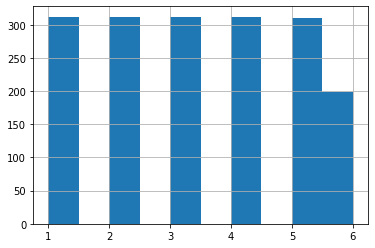

In [6]:
df[target].hist()

In [7]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df[target] = lb_make.fit_transform(df[target])
df[[target]].head(1)

,Target
0,0


# Import each tool you are evaluating here

Importing PyImpetus, Eli5, EvolutionaryFS, autofeat ; To Include More from https://www.opensourceagenda.com/tags/feature-selection?page=2

In [8]:
from PyImpetus import PPIMBC
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from EvolutionaryFS import GeneticAlgorithmFS
from zoofs import ParticleSwarmOptimization

import featurewiz as fwiz
from featurewiz import FeatureWiz

from autofeat import FeatureSelector

#from autofeat import AutoFeatRegressor

Imported DASK version = 0.0.90. nrows=None uses all rows. Set nrows=1000 to randomly sample fewer rows.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


# Define the dataset and target here

In [9]:
preds = [x for x in list(df) if x not in [target]]
len(preds)

20

In [10]:
X = df[preds]
y = df[target]
print(X.shape, y.shape)

(1754, 20) (1754,)


In [11]:
##get train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,
                                                    stratify=y)
print(X_train.shape, X_test.shape)

(1403, 20) (351, 20)


In [12]:
X_train

,EBC_MEAN,EBC_STD,EBC_AUC,CVD_SRF,BWMEAN,BWSD,CENTROID,CENTSD,SVDU,SVDV,SVDU1,SVDV1,SVDU2,SVDV2,STDU,STDV,STDU1,STDV1,STDU2,STDV2
921,-7.730000e-13,386.936599,-191.117477,-0.100202,71.703072,2.177368,-6.207514,0.706453,-0.139174,-0.044703,0.011843,0.003861,-0.006318,0.000582,0.015594,0.004219,0.140915,0.044780,0.141277,0.044943
680,-7.630000e-13,297.526909,105.111890,-0.100202,69.437118,0.496267,-4.822889,1.108326,-0.138317,-0.044806,-0.002865,-0.002096,-0.011788,0.000537,0.022041,0.002926,0.141392,0.044898,0.140919,0.044943
380,4.770000e-12,229.018036,-244.960631,-0.100202,71.525432,1.405371,-4.709148,0.669468,-0.138998,-0.044818,-0.012521,-0.002681,-0.009476,0.000015,0.017125,0.002745,0.140855,0.044866,0.141097,0.044947
1734,-1.940000e-12,233.130536,37.666189,-0.100202,69.854266,0.784204,-5.066045,0.326657,-0.138221,-0.044819,-0.021165,-0.002383,0.004508,-0.000139,0.022648,0.002728,0.139797,0.044883,0.141348,0.044946
1558,-2.260000e-12,547.267632,79.653504,-0.100202,70.299523,1.136868,-5.450236,0.809319,-0.138542,-0.044476,-0.019298,-0.005183,-0.005161,0.002698,0.020548,0.006170,0.140072,0.044646,0.141325,0.044865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,3.520000e-12,398.914227,135.220127,-0.100202,69.972291,0.899882,-4.518737,0.808149,-0.138393,-0.044707,0.005598,-0.001776,0.019465,0.002969,0.021546,0.004175,0.141308,0.044912,0.140048,0.044848
1493,2.450000e-12,554.407696,158.313327,-0.050050,69.678909,0.998230,-5.855716,4.109719,-0.139031,-0.031466,-0.000781,0.001378,0.011372,-0.001817,0.016848,0.003734,0.141419,0.031672,0.140954,0.031650
1555,-8.180000e-13,372.995927,-575.853013,-0.100202,69.635546,0.796435,-5.265836,0.520514,-0.138083,-0.044705,-0.021631,-0.003700,-0.005988,0.000691,0.023488,0.004197,0.139724,0.044794,0.141292,0.044941
938,1.410000e-12,255.807262,21.443078,-0.100202,70.312326,1.180189,-5.406845,0.452450,-0.138458,-0.044800,-0.019610,-0.002873,-0.005040,-0.000141,0.021119,0.003016,0.140028,0.044855,0.141330,0.044946


In [13]:
#Find categorical columns and object columns to transform into numeric: 
cat_columns = X.select_dtypes(['category']).columns
obj_columns = X.select_dtypes(['object']).columns
len(cat_columns), len(obj_columns)

(0, 0)

In [14]:
#Category+Object Transforms -> You must always fit_transform train while only doing transform for test
if len(cat_columns+obj_columns):
    for each_cat in cat_columns+obj_columns:
        LB = LabelEncoder()
        X_train[each_cat] = LB.fit_transform(X_train[each_cat])
        X_test[each_cat] = LB.transform(X_test[each_cat])
        print(each_cat+' completed transform')

In [15]:
#MinMax Scale Features -> You must always fit_transform train while only doing transform for test
for each_col in cols:
    scaler = MinMaxScaler(feature_range = (1,100))
    X_train[each_col] = scaler.fit_transform(X_train[each_col].values.reshape(-1,1))
    X_test[each_col] = scaler.transform(X_test[each_col].values.reshape(-1,1))
print('completed Min Max Scaling')

completed Min Max Scaling


In [16]:
X_train.head()

,EBC_MEAN,EBC_STD,EBC_AUC,CVD_SRF,BWMEAN,BWSD,CENTROID,CENTSD,SVDU,SVDV,SVDU1,SVDV1,SVDU2,SVDV2,STDU,STDV,STDU1,STDV1,STDU2,STDV2
921,40.559907,41.363295,55.309919,1.0,57.912076,96.896101,15.239770,10.241983,32.804707,1.772344,76.737019,81.781821,35.941529,52.394671,49.092284,44.996207,73.338941,99.269631,92.552552,99.983442
680,40.590748,28.377514,68.360816,1.0,11.516169,13.147286,55.184903,16.881606,69.332720,1.321280,44.550865,35.006533,23.975545,52.010682,79.931250,26.800018,98.442656,99.785056,74.043077,99.985943
380,57.655140,18.427348,52.937765,1.0,54.274852,58.436867,58.466219,9.630922,40.326818,1.271110,23.418347,30.412448,29.034729,47.630685,56.414993,24.246953,70.190579,99.648184,83.239286,99.999991
1734,36.960748,19.024644,65.389379,1.0,20.057366,27.491671,48.170069,3.967112,73.433986,1.266673,4.503371,32.751202,59.625345,46.338587,82.837137,24.012847,14.512030,99.722066,96.209785,99.999063
1558,35.973832,64.649626,67.239203,1.0,29.174095,45.060650,37.086539,11.941493,59.740077,2.765562,8.587711,10.767511,38.472860,70.166822,72.791011,72.453774,28.993941,98.681974,95.031467,99.644147


### Since The Tool is not allowed to look at test data, you must only use X_train and y_train for the Tool

In [17]:
train = pd.concat([X_train,y_train],axis=1)
print(train.shape)

(1403, 21)


In [18]:
test = pd.concat([X_test,y_test],axis=1)
print(test.shape)

(351, 21)


In [19]:
time_to_fit = pd.DataFrame(columns=['Feature_Engineering_Technique','Start_Time','End_Time','Time_to_fit'])
time_to_fit.head()

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (1403, 21)
    Caution: We will try to reduce the memory usage of dataframe from 0.24 MB
    Memory usage after optimization is: 0.07 MB
        decreased by 72.2%
     Loaded. Shape = (1403, 21)
No test data filename given...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    20 Predictors classified...
        No variables removed since no ID or low-information v

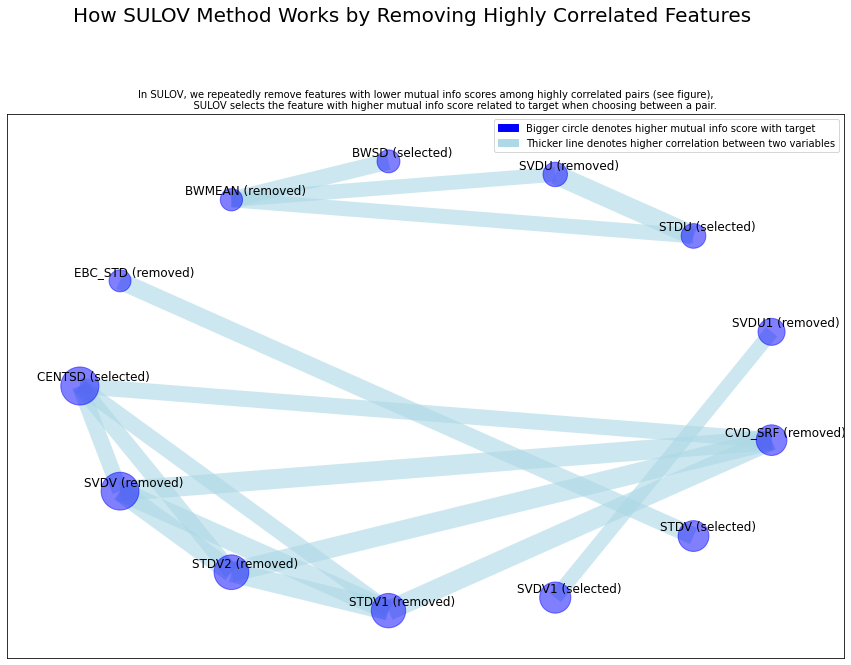

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 12
############## F E A T U R E   S E L E C T I O N  ####################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 12 
XGBoost version: 1.5.1
Number of booster rounds = 100
        using 12 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 10 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 8 variables...
            Time taken for regular XGBoost feature selection = 2 seconds
        using 6 variables...
            Time taken for regular XGBoost feature selection = 2 seconds
        using 4 variables...
            Time taken for regular XGBoost feature selection = 3 seconds
        using 2 variables...
            Time taken for regular XGBoost feature selection = 3 seconds


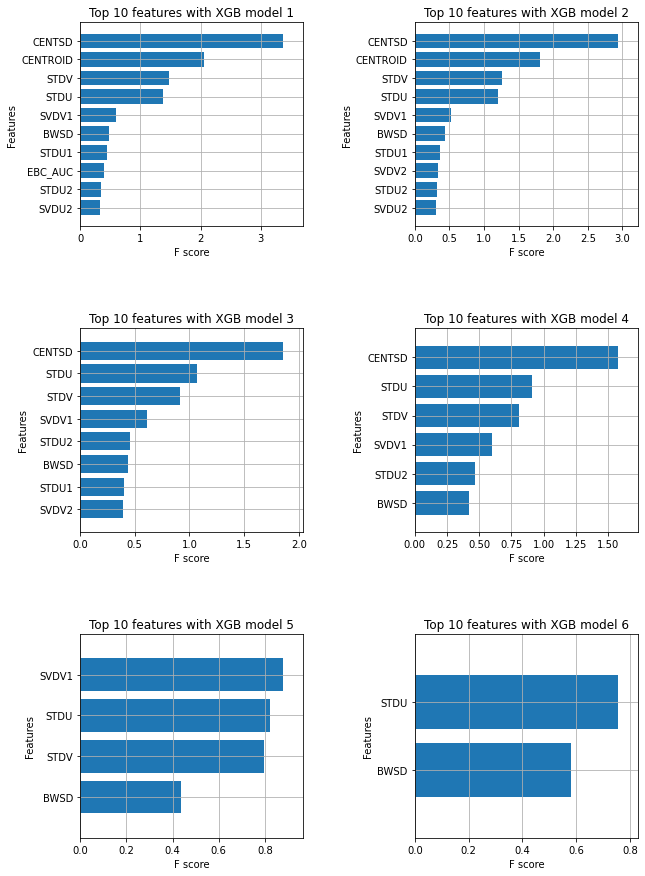

            Total time taken for XGBoost feature selection = 4 seconds
    ID variables are always selected so that rows can be identified. But they are not important!
Selected 11 important features:
['CENTSD', 'CENTROID', 'STDV', 'STDU', 'SVDV1', 'BWSD', 'STDU1', 'EBC_AUC', 'STDU2', 'SVDU2', 'SVDV2']
    Time taken = 4 seconds
Returning list of 11 important features and dataframe.
    Time taken to create entire pipeline = 4 second(s)


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643495e+09,1.643495e+09,4.272666


In [20]:
###################################################FeatureWiz#############################################################
### Now run it through featurewiz - remember featurewiz does not look at test data only modifies for numeric
start_featurewiz = time.time()

features = FeatureWiz(corr_limit=0.70, verbose=2, sep=',', header=0, feature_engg='', category_encoders='',dask_xgboost_flag=False, nrows=None)
X_train_selected = features.fit_transform(X_train,y_train)
end_featurewiz = time.time()
diff = end_featurewiz - start_featurewiz
best_columns_featurewiz = features.features
len(best_columns_featurewiz)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureWiz','Start_Time':start_featurewiz,'End_Time':end_featurewiz,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

In [ ]:
#################Autofeat#########################

start_autofeat = time.time()
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(X_train, y_train)
end_autofeat = time.time()
diff = end_autofeat - start_autofeat
best_columns_autofeat = list(new_X.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Autofeat','Start_Time':start_autofeat,'End_Time':end_autofeat,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

In [ ]:
##############FeatureEngine############
from sklearn.pipeline import Pipeline
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), # drops constand and quasi-constant altogether
    ('duplicated', DropDuplicateFeatures()), # drops duplicates
    ('correlation', SmartCorrelatedSelection( # drops correlated
        threshold=0.8,
        selection_method="model_performance",
        estimator=RandomForestClassifier(n_estimators=10, random_state=1),
    )),
])

# find features to remove

start_fe = time.time()
pipe.fit(X_train, y_train)
end_fe = time.time()

diff = end_fe - start_fe

print('Number of original variables: ', X_train.shape[1])

X_train_fe = pipe.transform(X_train)

print('Number of variables after selection: ', X_train_fe.shape[1])

best_columns_fe = list(X_train_fe.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureEngine','Start_Time':start_fe,'End_Time':end_fe,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

In [21]:
#################Autofeat#########################

start_autofeat = time.time()
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(X_train, y_train)
end_autofeat = time.time()
diff = end_autofeat - start_autofeat
best_columns_autofeat = list(new_X.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Autofeat','Start_Time':start_autofeat,'End_Time':end_autofeat,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 16 features after 5 feature selection runs
[featsel] 12 features after correlation filtering
[featsel] 10 features after noise filtering


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643495e+09,1.643495e+09,4.272666
1,Autofeat,1.643495e+09,1.643495e+09,3.893123


In [22]:
##############FeatureEngine############
from sklearn.pipeline import Pipeline
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), # drops constand and quasi-constant altogether
    ('duplicated', DropDuplicateFeatures()), # drops duplicates
    ('correlation', SmartCorrelatedSelection( # drops correlated
        threshold=0.8,
        selection_method="model_performance",
        estimator=RandomForestClassifier(n_estimators=10, random_state=1),
    )),
])

# find features to remove

start_fe = time.time()
pipe.fit(X_train, y_train)
end_fe = time.time()

diff = end_fe - start_fe

print('Number of original variables: ', X_train.shape[1])

X_train_fe = pipe.transform(X_train)

print('Number of variables after selection: ', X_train_fe.shape[1])

best_columns_fe = list(X_train_fe.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureEngine','Start_Time':start_fe,'End_Time':end_fe,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

Number of original variables:  20
Number of variables after selection:  13


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643495e+09,1.643495e+09,4.272666
1,Autofeat,1.643495e+09,1.643495e+09,3.893123
2,FeatureEngine,1.643495e+09,1.643495e+09,0.636858


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    8.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.16979643063896, 9.16246324540649, 6.3049486526681005]


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.4s finished


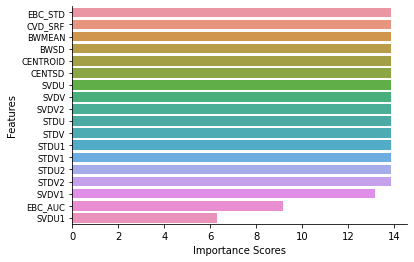

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643495e+09,1.643495e+09,4.272666
1,Autofeat,1.643495e+09,1.643495e+09,3.893123
2,FeatureEngine,1.643495e+09,1.643495e+09,0.636858
3,PyImpetus,1.643495e+09,1.643495e+09,81.597806


In [23]:
####################################################PyImpetus#####################################################
start_pyimpetus = time.time()
model = PPIMBC(LogisticRegression(random_state=27, max_iter=1000, class_weight="balanced"), cv=0, num_simul=20, simul_type=0, simul_size=0.2, sig_test_type="non-parametric", random_state=27, verbose=2, p_val_thresh=0.05)
# Fit this above object on the train part and transform the train dataset into selected feature subset
# NOTE: x_train has to be a dataframe and y_train has to be a numpy array
x_train = model.fit_transform(X_train, y_train.values)
# Transform the test set as well
# Check out the scores of each feature. The scores are in order of the selected feature list
# NOTE: You can use these scores ina feature selection ensemble
print("Feature importance: ", model.feat_imp_scores)
# Plot the feature importance scores
model.feature_importance()
best_columns_pyimpetus = list(x_train.columns)
end_pyimpetus = time.time()
diff = end_pyimpetus - start_pyimpetus
len(x_train.columns)
# Convert the data into numpy arrays
#x_train, x_test = x_train.values, x_test.values
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'PyImpetus','Start_Time':start_pyimpetus,'End_Time':end_pyimpetus,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

#######################################################Eli5##############################################################

sel = SelectFromModel(
    PermutationImportance(SVC(), cv=5),
    threshold=0.05,
).fit(X_train, y_train)
x_train = sel.transform(X_train)
best_columns_eli5 = x_train.columns

TypeError: check_cv() takes from 0 to 2 positional arguments but 3 were given

Time To Generate Features 

In [24]:
time_to_fit.head()

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643495e+09,1.643495e+09,4.272666
1,Autofeat,1.643495e+09,1.643495e+09,3.893123
2,FeatureEngine,1.643495e+09,1.643495e+09,0.636858
3,PyImpetus,1.643495e+09,1.643495e+09,81.597806


In [25]:
#############################################EvolutionaryFS#############################################
##get train and test data
data_dict={0:{'x_train':X_train,'y_train':y_train,'x_test':X_test,'y_test':y_test}}
columns_list=list(X.columns)

start_evolutionaryfs = time.time()
model_object=LogisticRegression(n_jobs=-1,random_state=1)
evoObj=GeneticAlgorithmFS(model=model_object,data_dict=data_dict,cost_function=f1_score,average='micro',cost_function_improvement='increase',columns_list=columns_list,generations=20,population=30,prob_crossover=0.9,prob_mutation=0.1,run_time=60000)
best_columns_EvolutionaryFS=evoObj.GetBestFeatures()
end_evolutionaryfs = time.time()
diff = end_evolutionaryfs - start_evolutionaryfs
len(best_columns_EvolutionaryFS)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'EvolutionaryFS','Start_Time':start_evolutionaryfs,'End_Time':end_evolutionaryfs,'Time_to_fit': diff} , ignore_index=True)
time_to_fit.head()

================= Best performance for generation 0 : 0.8233618233618235 =================
================= Best performance for generation 1 : 0.8176638176638177 =================
================= Best performance for generation 2 : 0.8205128205128205 =================
================= Best performance for generation 3 : 0.8205128205128205 =================
================= Best performance for generation 4 : 0.8262108262108262 =================
================= Best performance for generation 5 : 0.8319088319088319 =================
================= Best performance for generation 6 : 0.8376068376068376 =================
================= Best performance for generation 7 : 0.8376068376068376 =================
================= Best performance for generation 8 : 0.8433048433048433 =================
================= Best performance for generation 9 : 0.8433048433048433 =================
================= Best performance for generation 10 : 0.8433048433048433 ================

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643495e+09,1.643495e+09,4.272666
1,Autofeat,1.643495e+09,1.643495e+09,3.893123
2,FeatureEngine,1.643495e+09,1.643495e+09,0.636858
3,PyImpetus,1.643495e+09,1.643495e+09,81.597806
4,EvolutionaryFS,1.643495e+09,1.643495e+09,165.385983


In [26]:
#########################################################Zoof##############################################
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value ! 
def objective_function_topass(model,X_train, y_train, X_test, y_test):      
    model.fit(X_train,y_train)  
    P=log_loss(y_test,model.predict_proba(X_test))
    return P
    
# create object of algorithm
algo_object=ParticleSwarmOptimization(objective_function_topass,n_iteration=25,
                                       population_size=20,minimize=True)
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()                                       
# fit the algorithm
start_zoof = time.time()

best_columns_zoof = algo_object.fit(lgb_model,X_train, y_train, X_train, y_train,verbose=True)

end_zoof = time.time()
diff = end_evolutionaryfs - start_evolutionaryfs

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Zoof','Start_Time':start_zoof,'End_Time':end_zoof,'Time_to_fit': diff} , ignore_index=True)

		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.000903071575770025 					 0.000903071575770025 
Iteration 1 	 0.0006812992676835321 					 0.0006812992676835321 
Iteration 2 	 0.0006329087794783929 					 0.0006329087794783929 
Iteration 3 	 0.0005753920310062509 					 0.0005753920310062509 
Iteration 4 	 0.0006355900120640172 					 0.0005753920310062509 
Iteration 5 	 0.0005452181571193977 					 0.0005452181571193977 
Iteration 6 	 0.000578054601374726 					 0.0005452181571193977 
Iteration 7 	 0.000541644040383412 					 0.000541644040383412 
Iteration 8 	 0.0005162222799552519 					 0.0005162222799552519 
Iteration 9 	 0.0005461142370272509 					 0.0005162222799552519 
Iteration 10 	 0.0005083153427573543 					 0.0005083153427573543 
Iteration 11 	 0.0005356153066958874 					 0.0005083153427573543 
Iteration 12 	 0.0005063218659041442 					 0.0005063218659041442 
Iteration 13 	 0.0005345791855368791 					 0.0005063218659041442 
Iterati

In [27]:
###############################Sklearn Genetic Opt##########################################################

import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

clf = SVC(gamma='auto')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    scoring="balanced_accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1)

start_gopt = time.time()
# Train and select the features
evolved_estimator.fit(X_train, y_train)
end_gopt = time.time()

diff = end_gopt-start_gopt

# Features selected by the algorithm
best_columns_genetic_opt = list(evolved_estimator.best_features_)
best_columns_genetic_opt = X_train.columns[best_columns_genetic_opt]

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Genetic OPT','Start_Time':start_gopt,'End_Time':end_gopt,'Time_to_fit': diff} , ignore_index=True)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.260931	0.0993051  	0.663535   	0.180756   
1  	60    	0.329343	0.143121   	0.663535   	0.206901   
2  	60    	0.38254 	0.129099   	0.663535   	0.231675   
3  	60    	0.511232	0.14097    	0.704105   	0.264353   
4  	60    	0.618474	0.0992215  	0.704105   	0.348967   
5  	60    	0.677324	0.0396572  	0.706367   	0.497064   
6  	60    	0.699636	0.0178592  	0.73511    	0.663535   
7  	60    	0.715448	0.0155331  	0.742178   	0.704105   
8  	60    	0.728479	0.0155969  	0.742577   	0.704105   
9  	60    	0.740329	0.00315304 	0.743247   	0.73511    
10 	60    	0.741814	0.00181996 	0.743247   	0.73511    
11 	60    	0.742499	0.000489591	0.743247   	0.742178   
12 	60    	0.742998	0.000451872	0.743247   	0.742178   
13 	60    	0.743176	0.0002665  	0.743247   	0.742178   
14 	60    	0.743247	5.55112e-16	0.743247   	0.743247   
15 	60    	0.743247	5.55112e-16	0.743247   	0.743247   
16 	60    	0.743247	5.55112e-16	0.743247   	0.74

In [28]:
##################BorutaPy###################
from boruta import BorutaPy

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

start_bpy = time.time()
feat_selector.fit(X_train.values, y_train)
end_bpy = time.time()

diff = end_bpy-start_bpy

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

best_columns_borutapy = list(X_train.loc[:,feat_selector.support_].columns)

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'BorutaPy','Start_Time':start_bpy,'End_Time':end_bpy,'Time_to_fit': diff} , ignore_index=True)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	0
I

In [29]:
#################BorutaShap##################

from BorutaShap import BorutaShap

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

start_bshap = time.time()
Feature_Selector.fit(X=X_train, y=y_train, n_trials=100, sample=False,train_or_test = 'test', normalize=True,verbose=True)
end_bshap = time.time()

diff = end_bshap-start_bshap

# check selected features - first 5 features are selected
subset = Feature_Selector.Subset()

best_columns_borutashap = list(subset.columns)

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'BorutaShap','Start_Time':start_bshap,'End_Time':end_bshap,'Time_to_fit': diff} , ignore_index=True)

  0%|          | 0/100 [00:00<?, ?it/s]

15 attributes confirmed important: ['EBC_STD', 'STDU1', 'STDV2', 'STDV', 'SVDU', 'SVDU1', 'CENTSD', 'BWMEAN', 'CENTROID', 'STDU', 'SVDV', 'CVD_SRF', 'BWSD', 'EBC_AUC', 'STDV1']
4 attributes confirmed unimportant: ['SVDV1', 'SVDU2', 'EBC_MEAN', 'SVDV2']
1 tentative attributes remains: ['STDU2']


In [30]:
#Create a dictionary of lists with feature engineering technique
fs = {"FeatureWiz":best_columns_featurewiz,"Autofeat":best_columns_autofeat,"FeatureEngine":best_columns_fe,"PyImpetus":best_columns_pyimpetus,"EvolutionaryFS":best_columns_EvolutionaryFS,"Zoof":best_columns_zoof, "Genetic OPT":best_columns_genetic_opt, "BorutaPy":best_columns_borutapy, "BorutaShap":best_columns_borutashap}
#fs

# Here is an even simpler way to do multi fold cross validation
## First set a baseline performance by including all features in model
## Then compare that model to feature selection by EvolutionaryFS

## The baseline model with all features yields a balanced accuracy score of 91.88%

In [31]:
## You must set the randomstate for cross validation. Otherwise, scores will be totally random each time.
from sklearn.model_selection import StratifiedKFold, KFold
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=99)
#cv = KFold(n_splits=5,shuffle=False, random_state=99) ## Use this for Regression

# We have to do the same transforms for X and y 

In [32]:
#Category+Object Transforms -> You must always fit_transform train while only doing transform for test
if len(cat_columns+obj_columns):
    for each_cat in cat_columns+obj_columns:
        LB = LabelEncoder()
        X[each_cat] = LB.fit_transform(X[each_cat])
        print(each_cat+' completed X transform')
X.head()

,EBC_MEAN,EBC_STD,EBC_AUC,CVD_SRF,BWMEAN,BWSD,CENTROID,CENTSD,SVDU,SVDV,SVDU1,SVDV1,SVDU2,SVDV2,STDU,STDV,STDU1,STDV1,STDU2,STDV2
0,3.310000e-12,241.151763,253.296989,-0.05005,69.955503,0.754821,-3.884671,3.731692,-0.139134,-0.031657,-0.003712,-0.000048,0.010217,-0.000991,0.015958,0.001364,0.141372,0.031702,0.141044,0.031687
1,1.580000e-12,248.061879,-248.435294,-0.05005,69.908023,0.731770,-5.730122,3.912357,-0.139162,-0.031654,-0.000295,-0.000284,-0.010102,0.001015,0.015706,0.001432,0.141421,0.031701,0.141053,0.031686
2,-9.830000e-13,267.246946,46.601608,-0.05005,69.737474,0.792784,-5.577865,3.557345,-0.139042,-0.031649,0.000227,-0.000413,-0.012220,0.001125,0.016750,0.001535,0.141421,0.031699,0.140882,0.031682
3,-4.190000e-12,272.212727,267.322700,-0.05005,69.776588,0.586941,-4.485729,3.434208,-0.139007,-0.031647,-0.002008,-0.000146,-0.010594,0.001170,0.017044,0.001576,0.141407,0.031702,0.141016,0.031681
4,4.410000e-12,309.880714,241.315629,-0.05005,69.835480,0.624628,-4.620188,3.573509,-0.139055,-0.031635,-0.001434,0.000029,-0.010228,0.001255,0.016644,0.001807,0.141414,0.031702,0.141044,0.031677


In [33]:
#MinMax Scale Features -> You must always fit_transform train while only doing transform for test
for each_col in cols:
    scaler = MinMaxScaler(feature_range = (1,100))
    X[each_col] = scaler.fit_transform(X[each_col].values.reshape(-1,1))
print('completed Min Max Scaling for X')

completed Min Max Scaling for X


# Using all features in dataset, this is the baseline score

In [34]:
model1 = RandomForestClassifier(n_estimators=300, random_state=99)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=model1, X=X, y=y, scoring='balanced_accuracy', cv=cv)
print(scores)
print('Mean Score for all features = %s' %scores.mean())

[0.84907178 0.82379032 0.85061657 0.85326208 0.83706855]
Mean Score for all features = 0.8427618588102458


##  Here we run Cross Validation and get accuracy metrics for each technique

In [35]:
performance = pd.DataFrame(columns=['Start_Time','End_Time','Run_Time','Accuracy_Score','Model','Feature_Engineering_Technique'])
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=99)
for key,value in fs.items():
    start = time.time()
    model2 = RandomForestClassifier(n_estimators=300, random_state=99)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(estimator=model2, X=X_train[value], y=y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    end = time.time()
    diff = (end-start)
    print(scores)
    print('Mean Score for %s = %s' %(key, scores.mean()))
    performance = performance.append({'Start_Time':start,'End_Time':end,'Run_Time':diff,'Accuracy_Score':scores.mean(),'Model':'RandomForest','Feature_Engineering_Technique':key} , ignore_index=True)
    time_to_fit.loc[(time_to_fit['Feature_Engineering_Technique']==key), 'Mean_CV_Accuracy'] = scores.mean()
time_to_fit

[0.85591398 0.84690051 0.83203231 0.80393707 0.8089752 ]
Mean Score for FeatureWiz = 0.8295518158876455
[0.87053763 0.83829082 0.84251701 0.82219813 0.81700022]
Mean Score for Autofeat = 0.8381087612464342
[0.80311828 0.83308248 0.83702806 0.80171344 0.81693219]
Mean Score for FeatureEngine = 0.818374890278692
[0.86258065 0.84696854 0.83876701 0.82080782 0.8289752 ]
Mean Score for PyImpetus = 0.8396198430985298
[0.85591398 0.83696854 0.84216837 0.8140051  0.81564187]
Mean Score for EvolutionaryFS = 0.8329395709896861
[0.86924731 0.84169218 0.85071003 0.82080782 0.81564187]
Mean Score for Zoof = 0.8396198430985298
[0.84053763 0.75856718 0.81675595 0.78997449 0.80006144]
Mean Score for Genetic OPT = 0.8011793394777266
[0.85591398 0.84696854 0.83203231 0.8140051  0.8189752 ]
Mean Score for BorutaPy = 0.8335790267719989
[0.85591398 0.83030187 0.83203231 0.81740646 0.81564187]
Mean Score for BorutaShap = 0.8302592988808426


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy
0,FeatureWiz,1.643495e+09,1.643495e+09,4.272666,0.829552
1,Autofeat,1.643495e+09,1.643495e+09,3.893123,0.838109
2,FeatureEngine,1.643495e+09,1.643495e+09,0.636858,0.818375
3,PyImpetus,1.643495e+09,1.643495e+09,81.597806,0.839620
4,EvolutionaryFS,1.643495e+09,1.643495e+09,165.385983,0.832940
5,Zoof,1.643495e+09,1.643495e+09,165.385983,0.839620
6,Genetic OPT,1.643495e+09,1.643496e+09,545.242374,0.801179
7,BorutaPy,1.643496e+09,1.643496e+09,11.469076,0.833579
8,BorutaShap,1.643496e+09,1.643496e+09,535.433595,0.830259


## You must finally train a model on X_train and test it on X_test using selected features

In [36]:
#Using Lime to interpret the results of model
#from lime import lime_text
from sklearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score, mean_squared_error
#import lime.lime_tabular

for key,value in fs.items():
    model3 = RandomForestClassifier(n_estimators=300, random_state=99)
    from sklearn.metrics import classification_report
    model3.fit(X_train[value], y_train)
    print(classification_report(y_test, model3.predict(X_test[value])))
    score_val = balanced_accuracy_score(y_test, model3.predict(X_test[value]))
    time_to_fit.loc[(time_to_fit['Feature_Engineering_Technique']==key), 'Mean_Test_Accuracy'] = score_val
    #print("Lime Feature Importance : "+key)
    #explainer = lime.lime_tabular.LimeTabularExplainer(X_train[value].values, feature_names=X_train[value].columns, class_names=[0, 1], mode='classification')
    #exp = explainer.explain_instance(X_test[value].values[1], model3.predict_proba, num_features=len(X_train[value].columns))
    #exp.show_in_notebook(show_table=True, show_all=False)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       0.89      0.90      0.90        63
           2       0.84      0.87      0.86        62
           3       0.69      0.60      0.64        62
           4       0.68      0.74      0.71        62
           5       0.97      0.93      0.95        40

    accuracy                           0.83       351
   macro avg       0.84      0.84      0.84       351
weighted avg       0.83      0.83      0.83       351

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       0.92      0.90      0.91        63
           2       0.84      0.84      0.84        62
           3       0.70      0.65      0.67        62
           4       0.67      0.74      0.70        62
           5       0.95      0.93      0.94        40

    accuracy                           0.84       351
   macro avg       0.85

In [37]:
time_to_fit['Dataset'] = "Spectogram"
time_to_fit['Type'] = "Multi Classification"
time_to_fit['Metric'] = "balanced accuracy"

In [38]:
time_to_fit

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy,Mean_Test_Accuracy,Dataset,Type,Metric
0,FeatureWiz,1.643495e+09,1.643495e+09,4.272666,0.829552,0.839907,Spectogram,Multi Classification,balanced accuracy
1,Autofeat,1.643495e+09,1.643495e+09,3.893123,0.838109,0.842595,Spectogram,Multi Classification,balanced accuracy
2,FeatureEngine,1.643495e+09,1.643495e+09,0.636858,0.818375,0.850262,Spectogram,Multi Classification,balanced accuracy
3,PyImpetus,1.643495e+09,1.643495e+09,81.597806,0.839620,0.851784,Spectogram,Multi Classification,balanced accuracy
4,EvolutionaryFS,1.643495e+09,1.643495e+09,165.385983,0.832940,0.850702,Spectogram,Multi Classification,balanced accuracy
5,Zoof,1.643495e+09,1.643495e+09,165.385983,0.839620,0.857203,Spectogram,Multi Classification,balanced accuracy
6,Genetic OPT,1.643495e+09,1.643496e+09,545.242374,0.801179,0.806213,Spectogram,Multi Classification,balanced accuracy
7,BorutaPy,1.643496e+09,1.643496e+09,11.469076,0.833579,0.846450,Spectogram,Multi Classification,balanced accuracy
8,BorutaShap,1.643496e+09,1.643496e+09,535.433595,0.830259,0.839864,Spectogram,Multi Classification,balanced accuracy


# This is another way to know how well feature selection works

notes : Class imbalance - PyImpetus